# System resilience

*What distinguishes biological systems from physical ones? - Biological systems perform computations.*

Write "In this chapter, you will learn:"
Example of system resilience problem


At some point of accumulating evidences about object of study we stop just speculating about its properties and start mathematical modelling. 

**Done**
* Recap differential equations
    * linear ODE
    * nonlinear ODE
    * numerical integration

**Plan**
* Stability theory and bifurcations
    * Stability intuition (as in Sole Lecture)
    * Types of bifurcations (see the book) (or Catastrophic bifurcation and criticality), bifurcation diagram
    * Example of system
* System ODE
    * Stability in linear multidimensional case
    * Nonlinear systems
    * Linear approximations around tipping point ?????
    * Univesality principle
    * Example complex system aging and 
* Critical slowing down
    * real data case
    * construct resilience indicator from data?
    * fitting a stochastic differential equation from data?
    * resilience analysis and maximal theoretical lifespan prediction.


## Recap differential equations

Differential equation is a very useful instrument for understanding and modeling real biological processes. Once you develop a basic intuition on differential equation you will see the world as a set of dynamic systes. What is a dynamic systems? Well, everything! Everything what we may observe evolving in time could be (and possibly must be) described with this instrument.

In general, a differential equation is written as

$$
  \dot{x} = f(x, t)
$$ (diff_eq)

where f(x, t) - given function of time $t$ and state variable $x$ itself. Note, that $x=x(t)$ is also a function of time, hence, $\dot{x} = dx(t)/dt = dx/dt$ - we omit $(t)$ for simplicity. A huge body of knowledge of differential equations theory has been elaborated for ages. In this tutorial we only touch the most important topics needed for understanding complex systems resilience introduced in the previous chapter.

### Linear ordinary differential equations

First, let's start from the most simplest cases of so called growth/death models. Let:

$$ 
    \dot{x} = a 
$$

here $a$ is a constant;

$$ 
    \frac{dx}{dt} = a 
$$
$$ 
    dx = a\cdot dt 
$$

integrate both sides,

$$ 
    \int dx = a \int dt 
$$
$$
    x(t) = at + C
$$ (ex_sol_1)

where constant $C$ is defined from initial conditions. This is the simplest case of separable equation (s.t. you can separate variable $x$ from $t$ on both sides) describes **linear growth** of $x$. For example, the amount of water accumulated in water tank fed by pipe. The next case:

$$ 
    \dot{x} = ax 
$$
$$ 
    \int \frac{dx}{x} = a\int dt 
$$
$$ 
    \ln(x(t)) = at + C
$$
$$ 
    x(t) = e^Ce^{at} = C_1e^{at}
$$ (ex_sol_2)

This equation describes dynamis of so called **exponential growth/death** depending on the sign of the coeffcicient $a$. One common example of a system described by this equation is a number of bacteria in a petri dish in case when resources for the growth are unlimited. Indeed, you know that number of bacteria next day depends on the number of bacteria on the previous day. Thus, the differential equation has the form $\dot{x} = ax$ and has a solution in a form of exponential growth.

Let's draw the solutions {eq}`ex_sol_1`, {eq}`ex_sol_2`.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16' # increase font size

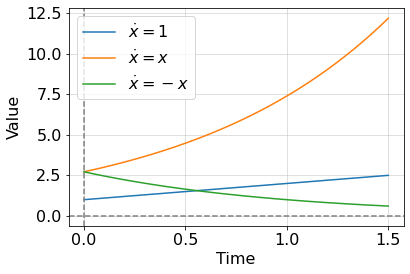

In [2]:
x1 = lambda t, a, C: a*t + C
x2 = lambda t, a, C: np.exp(a*t) * np.exp(C)

t = np.linspace(0, 1.5, 100)
C = 1

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.plot(t, x1(t, 1, C), label='$\dot{x} = 1$');
ax.plot(t, x2(t, 1, C), label='$\dot{x} = x$');
ax.plot(t, x2(t, -1, C), label='$\dot{x} = -x$');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend();

Two important observations: (1) the solution of equation {eq}`ex_sol_1` is always diverges, i.e there is no non-zero constant $Const$ such that $x(\infty) \to Const$; (2) the solution of equation {eq}`ex_sol_2` has three regimes: one at positive constant $a$ - divergence (exponential growth), one at negative $a$ - convergence to zero (exponential decay), and one at $a=0$ - trivial case with no dynamics. Adjusting constant $a$ continiously leads to switching between regimes which is something that we call **bifurcation** and will study in further. In other words. they say a system undergoes a bifurcation as $a$ approaches to zero (from left or right side). Of course, in this case that the system changes its behavior **qualitatively**.

### Non-linear ordinary differential equations

Linear differential equations and systems of them porvides a lot of possibilities for modelling technical and living systems. However, already in case of bacteria growth modeling with limited resources we force the need to use quadratic models. This is where logistic model appears:

$$ 
    \dot{x} = rx(1 - \frac{x}{K}) 
$$

here we introduced two additional parameters: $r$ - growth rate, and $K$ - carrying capacity. To understand this equation deeper let's rewrite it in expanded form:

$$ 
    \dot{x} = rx - \frac{rx^2}{K} =  rx - \delta x^2
$$

The first term is a growth term responsible for the increase of number of bacteria with rate $r$. The second term is more tricky and suddenly quadratic with a new parameter $\delta = r/K$ which is interpreted as death rate. The idea of second term is that after $x$ becomes quite large number the growth must rapidly slow down modelling, thus, a deficit of resources. The good idea to use for that a quadratic term which increases faster than linear and not so hard for computation. But the right question here is: "why not cubic or exponent or something else?". It turns out that the quadratic term is a good approximation of the behavior of real-world cases of growth. One additional intuition behind quadratic term is that it reflects pairwise interactions of $x$ species, which can we may interpret as a competition for resources (aka crowding pressure).

Let's solve it:

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) 
$$
$$ 
    \frac{dx}{x(1 - \frac{x}{K}) } = rdt
$$

split left part by sum of fractions with some unknown (yet) coefficients $A$ and $B$:

$$ 
    \frac{Adx}{x} + \frac{Bdx}{(1 - \frac{x}{K}) } = rdt
$$

consider the following equation for the nominator:

$$ 
    A(1 - \frac{x}{K})dx + Bxdx = dx
$$
$$ 
    A(1 - \frac{x}{K}) + Bx = 1
$$
$$ 
    A - A\frac{x}{K} + Bx = 1
$$
$$ 
    A - x(\frac{A}{K} + B) = 1
$$

from the obtained equation we can compose the following system:

$$
\begin{cases}
    -\frac{A}{K} + B = 0 \rightarrow B = \frac{A}{K}\\
    A = 1\\
\end{cases}
$$

Thus, we have

$$ 
    \frac{dx}{x} + \frac{\frac{1}{K}dx}{(1 - \frac{x}{K}) } = rdt
$$
$$ 
    \int\frac{dx}{x} + \frac{1}{K}\int\frac{dx}{(1 - \frac{x}{K}) } = \int rdt
$$
$$ 
    \ln(x) - \ln(1 - \frac{x}{K}) = rt + C
$$
$$ 
    \ln(\frac{x}{1 - \frac{x}{K}}) = rt + C
$$
$$ 
    \frac{x}{1 - \frac{x}{K}} = C_1e^{rt}
$$

It is easy to see that $C_1$ can be computed from initial value problem (at $t=0$) as following:

$$ 
    C_1 = \frac{x_0}{1 - \frac{x_0}{K}} = \frac{Kx_0}{K - x_0}
$$

where $x_0 = x(t=0)$ correspondingly. After expressing $x$ from the integral above have:

$$ 
    x(t) = \frac{K}{1 + \frac{K - x_0}{x_0}e^{-rt}}
$$ (ex_sol_3)

What regimes are possible for this solution? Let's suppose that carrying capacity $K=1$, initial population $x_0=0.5$ and explore graphically the dynamics at different $r$:

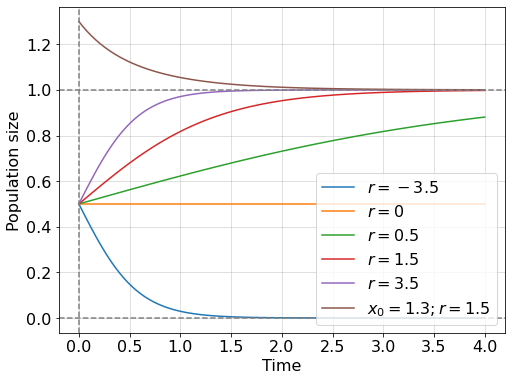

In [3]:
x3 = lambda t, K, r, x0: K / (1 + (K - x0) / x0 * np.exp(-r * t))

t = np.linspace(0, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
for r in [-3.5, 0, 0.5, 1.5, 3.5]:
    ax.plot(t, x3(t, 1, r, 0.5), label=f'$r = {r}$');

ax.plot(t, x3(t, 1, 1.5, 1.3), label=f'$x_0 = 1.3; r = 1.5$'); # another initial condition
ax.axhline(0, color='grey', ls='--')
ax.axhline(1, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right');

Excellent! We solved a new kind of dynamical system describing bacterial growth with limited resources. As before we observe three different regimes for $r>0$ - logistic growth; $r=0$ - no dynamics; $r<0$ - logistic decay (not exponential!). But we also see something new, our solutions for growth are bounded with carrying capacity $K=1$ and, for all initial conditions (even for larger than $K$), trajectories *attracts* to a fixed value $K$ which is called **attractor**. In the next chapter we will address more to attractors, but before that, we need to learn what to do with non-integrable non-linear differential equations.

```{admonition} Exercise
:class: dropdown
What kind of growth exhibits equation $\dot{x} = a*x^2$? Solve the equation for positive $a$ and $x_0 > 0$. What strange about this model? What is the name of this model (try to google or chatGPT it)?
```



### Numerical integration

The class of integrable differential equation is very small, even so they are extremely useful for describing complex systems dynamics. In some cases, however, you may develop more sophisticated model of a process under study and the corresponding differential equation does not have a closed form solution. What can we do in this case? Consider the following complication of the logistic model:

$$
    \dot{x} = r(t) (x  - \frac{x^2}{K(t)})  =  r_0 sin^2(t) (x  - \frac{x^2}{1 + \sqrt{t}})
$$ (eq_complex_logistic)

now our logistic model contains two additional assumptions: (i) the growth rate changes as a sinusoidal function of time $r = r(t) = r_0 sin^2(t)$ - this models a photo-sensitivity of bacteria allowing them to reproduce effectively in day time with maximum growth rate or $r_0$; (ii) the carrying capacity slowly increases with time by square root law starting from 1, namely $K = K(t) = 1 + \sqrt{t}$. You can check that this new differential equation is non-integrable in elementary functions, so we need to obtain solution **numerically**.

We introduce **Forward-Euler** scheme of integration. without going into the details of the proof, forward Euler prescribes just to iteratively compute each next step as a sum of result from the previous step and computed value of the function on the previous step. Let's rewrite our new logistic equation {eq}`eq_complex_logistic` in the general form:

$$
  \frac{dx}{dt} = f(x, t)
$$ 

rewrite the differetial equation in finite-difference form:

$$
  \frac{\Delta x}{\Delta t} = \frac{x_i - x_{i-1}}{\Delta t} = f(x_{i-1}, t_{i-1})
$$ 

expressing $x_i$ from the latter have:

$$
  x_i = x_{i-1} + f(x_{i-1}, t_{i-1})\Delta t 
$$ 

We did it! We have a clear iterative scheme for integrating our system. Let's code it, assuming that $x_0 = 0.5$:

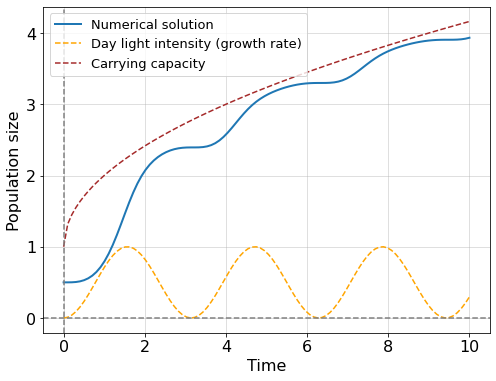

In [25]:
f = lambda x, t, r0: r0 * np.sin(t)**2 * (x - x**2 / (1 + np.sqrt(t)))

n = 100 # number of integration steps
t = np.linspace(0, 10, n)
dt = t[1] - t[0] #time difference
r0 = 3
x0 = 0.5
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    x[i] = x[i-1] + f(x[i-1], t[i-1], r0) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
ax.plot(t, x, label=f'Numerical solution', lw=2);
ax.plot(t, np.sin(t)**2, label=f'Day light intensity (growth rate)', color='orange', ls='--');
ax.plot(t, 1 + np.sqrt(t), label=f'Carrying capacity', color='brown', ls='--');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

First, it is beautiful, isn't it? We see that day time affects an ability to growth and expanding carrying capacity determines limits of this growth. This simple example helps us to understand the **top-down** approach to modelling. This means that we do not know exactly the underlying microscopic biological mechanism inducing growth in number of bacteria, rather we try to guess the function which can *describe* the observable behaviour. This is something that also known as **phenomenological** model which tries to describe phenomenon without explicit pointing to the mechanism of it.

```{admonition} Note
:class: dropdown
Surely, forward Euler's method is not the best in terms of accuracy of approximation and speed of convergence (the famous Runge Kutta method can be much better). To dig into the plephora of algorithms for numerical integrations we recommend the following book {cite}`holmes2016introduction`
```


## Stability theory and bifurcations

### Stability intuition

Now we start to develop the core dynamical system property - its stability. It is a case when mathematical framework has a strict everyday physical analogy. Let's discuss the picture below:

<img src="https://drive.google.com/uc?id=1faLz8aoxlaxa3az5PR5iPW8t45W9BnBH"
     alt="potential" 
     width="600"/>
<p align = "left">
Fig. 1. Example of potential landscape.
</p>

We see a ball in three positions. You can easily say which position is stable, unstable, or metastable. Indeed, the first position denoted $x^*_1$ - is stable position. Mathematically speaking, the position of $x$ is called stable if after any arbitrarily small perturbation $y$ the system return the the initial state $x^*_1$. The opposite case for $x^*_2$ where any small perturbation force the system to leave the previous state. The third case $x^*_3$ is metastable (or marginally stable) that is this position is a midpoint between stable and unstable regimes of the system (remember equation {eq}`ex_sol_2` with $a=0$). This third case is also called **critical** and it is very important for our discussion of system **resilience**. One minor technical thing remained. We need to understand how to obtain this so called **potential landscape** depicted at Fig.1, i.e. some function whose maxima, minima and *saddles* (or flat valleys) describes the full set of fixed (or critical) points $\{x^* | \frac{dx}{dt}|_{x=x^*}=0\}$, and, what is more important, characterizes stability properties of these points.

Let's use already familiar logistic model for all derivations.

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) = f_\theta(x)
$$

This model has two parameters $r$ and $K$ which we just gather in a set $\theta = \{r, K\}$ and will use subscript $\theta$ for the denotation pointing that our function $f_\theta$ contains these two parameters. By definition a fixed point is a point where derivative equals to zero - where the dynamics "stops".

$$ 
    \frac{dx}{dt} = 0 \Leftrightarrow f_\theta(x) = rx(1 - \frac{x}{K}) = 0
$$

It is easy to see that a function $rx(1 - \frac{x}{K}) = 0$ has roots at points $x=0$ and $x = K$. As we discussed above, the point $x=K$ is an attractor but can we proof rigorously that it is also a stable point? And, what type of stability $x=0$ has? Consider the following equation perturbed around a fixed point:

$$ 
    \frac{d(x^* + y)}{dt} = f_\theta(x^* + y)
$$

expand the left term as sum of derivative:

$$ 
    \frac{dx^*}{dt} + \frac{dy}{dt} = f_\theta(x^* + y)
$$

by definition, $dx^*/dt$ = 0 so we have:

$$ 
    \frac{dy}{dt} = f_\theta(x^* + y)
$$

We are interested how function $f_\theta$ depends on a small perturbation $y$ around $x^*$, so let's expand it in a Taylor series around $x^*$:

$$ 
    \frac{dy}{dt} = f_\theta(x^*) + ((x^* + y) - x^*)\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$
$$ 
    \frac{dy}{dt} = f_\theta(x^*) + y\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$

Assuming that: (i) perturbation $y$ is infinitesimal, (ii) function $f_\theta$ is continious and (at least) twice differentiable - it is enough to consider only linear terms in the Taylor expansion. Remember also that the constant term $f_\theta(x=x^*, y=0)=0$ by definition, finally have:

$$ 
    \frac{dy}{dt} \approx y\frac{df_\theta}{dx}\bigg|_{x=x^*}
$$

Historically, the partial derivative term is usually denoted as $\lambda_\theta$:

$$ 
    \frac{dy}{dt} \approx \lambda_\theta y
$$ (eq_pert)

We will refer to the obtained as **perturbation equation**. A simple analysis is now applied to determine whether the perturbation grows or decays as time evolves (remember equation {eq}`ex_sol_2` with $\lambda_\theta$ instead of $a$). If $\lambda_\theta > 0$ the initially arbitrarily small perturbation grows in time and dynamics becomes unstable. On the other hand, if $\lambda_\theta < 0$ the perturbation decays in time and stable dynamics is observed. In the intermediate case $\lambda_\theta = 0$ system is in **critical state** and nothing can be said about system stability until the value of $\lambda_\theta$ changes.

Let's look how $\lambda_\theta$ depends on its parameters $\theta$:

$$
    \lambda_\theta = \frac{df_\theta}{dx}\bigg|_{x=x^*} = r - \frac{2r}{K}x^*
$$

one can see that for $x^*=K$ the system is stable while $r>0$ because $r - \frac{2r}{K}K = r - 2r = -r < 0$. The opposite works for $x^*=0$, then $r - \frac{2r}{K}0 = r > 0$ - the system is unstable (revise the plot in non-linear system paragraph).


### Potential function

Once we studied a system behavior around fixed points, we are ready to formulate a potential function definition. It is rather straightforward but let us do step back and discuss what drives any dynamics system. It is a funny coincidence (or not?) that symbol of function $f$ is denoted with letter "f" just like a physical force $F$. Indeed, any mechanistic dynamical systems drives with some force $F$:

$$
    \frac{dx}{dt} = F
$$

we also know from the higher school physics course that force acts on a body moving in a potential field $V$, and the force equals to the negative gradient of the field i.e.

$$
    \frac{dx}{dt} = F = -\frac{dV}{dx}
$$

Thus, remebering that in our problem $F = f_\theta$ have the following equation for the potential function:

$$
    V_\theta = -\int f_\theta dx
$$

substitution of the logistic function yields:

$$
    V_\theta(x) = -\int rx(1 - \frac{x}{K}) dx = r(\frac{x^3}{3K} - \frac{x^2}{2}) + V_0
$$

where $V_0$ is a constant which can be equal to zero (we do not bother of constant potential level, only differences and fixed points are interested in our discussion). 

Let's finally draw the potential landscape for logistic growth model:


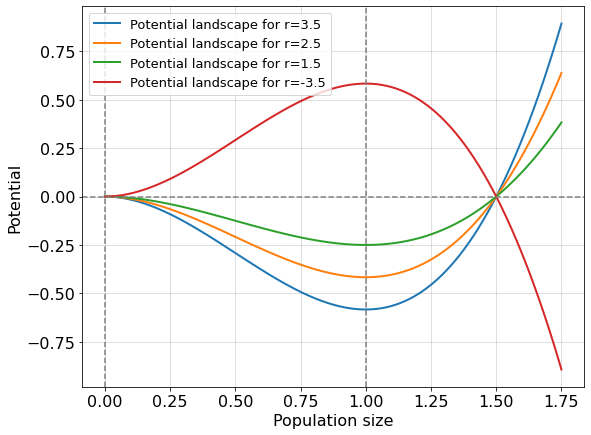

In [44]:
V = lambda x, r, K: r * (x**3 / (3 * K) - x**2 / 2)

x = np.linspace(0, 1.75, 100) #negative population size is non-physical
K = 1

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.set_xlabel('Population size')
ax.set_ylabel('Potential')
for r in [3.5, 2.5, 1.5, -3.5]:
    ax.plot(x, V(x, r, K), label=f'Potential landscape for r={r}', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.axvline(1, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

As we computed in the previous paragraph, for a positive $r$ we have convex potential landscape around the point $x=K$ (attractor) such that any imaginary ball placed at this point returns to it after small perturbation. Moreover, the point $x=0$ reads as unstable, equivalently, potential function around $x=0$ is concave. Hovewer, once a parameter $r$ crosses $0$ towards negative values we observe a completely opposite picture. The point $x=K$ becomes unstable and divides two different regimes: complete decay (left) and unlimited growth (right). Unlimited growth is a new property of this system which initially assumed to model limiting a reproduction capacity. So, possibly negative values of $r$ makes this concrete model non-physical. 

Interestingly that a sequence of parameters $r$ changes the shape of potential function ultimately converting it to the qualitatively different state. In the next paragraph we consider how briefly to describe the stability properties of system with one diagram tracking its journey towards bifurcation.

### Catastrophic bifurcation

## System of differential equations

consider $\ddot{x} = f(x)$



{cite}`gao2016universal`

Cite Kapitza model of human population


## Recap differential equations

# Learn More

[Principles of Biological Design (Lectures)](https://www.youtube.com/playlist?list=PLcv1wv7ZF5IXWunUDAiQym866-MntorVp) \
[Dynamical Systems with Applications using Python](https://link.springer.com/book/10.1007/978-3-319-78145-7)
